#**Import Libraries**

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import chi2 , f_classif
from IPython.core.display import clear_output
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from IPython.display import clear_output
!pip install category_encoders
import category_encoders as ce
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Problem 1**

#load_data

In [250]:
data= load_wine()
X = data.data
y = data.target

#A

In [251]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state=0)

#B

In [252]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [253]:
y_pred=model.predict(x_test)
print(f'the accuracy = {accuracy_score(y_test, y_pred)}')
print("Classification Report:\n\n", classification_report(y_test, y_pred))

the accuracy = 0.9444444444444444
Classification Report:

               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.86      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



#C

In [254]:
FeatureSelection = GenericUnivariateSelect(score_func=chi2, mode= 'k_best', param=2)
x = FeatureSelection.fit_transform(X, y)

In [255]:
feat = FeatureSelection.get_support()
feat = [i for i,v in enumerate(feat) if v] #return indecises that have true
feat

[9, 12]

In [256]:
print(data.feature_names[feat[0]], ' ', data.feature_names[feat[1]])

color_intensity   proline


In [257]:
x_tr = x_train[:,feat]
y_tr = y_train

x_ts = x_test[:,feat]
y_ts = y_test

In [258]:
model = GaussianNB()
model.fit(x_tr,y_tr)

GaussianNB()

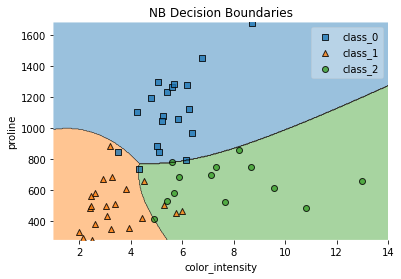

In [259]:
from mlxtend.plotting import plot_decision_regions
ax = plot_decision_regions(x_ts, y_ts, clf=model, legend=2)
handles, labeles = ax.get_legend_handles_labels()
ax.legend(handles, data.target_names, framealpha=0.3, scatterpoints=1)

plt.title('NB Decision Boundaries')
plt.xlabel(data.feature_names[feat[0]])
plt.ylabel(data.feature_names[feat[1]])

clear_output()
plt.show() 

#**Problem 2**

#read_data

In [260]:
df=pd.read_csv('car_evaluation.csv')

#A

In [261]:
def shuffle_data_using_sample(data_frame):
  return data_frame.sample(frac=1, random_state=5)
# another_way
def shuffle_data_using_shuffle(data_frame):
  return np.random.shuffle(data_frame)

In [262]:
data=shuffle_data_using_sample(df)
#shuffle_data_using_shuffle(df.to_numpy())

In [263]:
train=data.iloc[0:1000]
validate=data.iloc[1000:1300]
test=data.iloc[1300:1728]

#B

In [278]:
df.columns
#['buying_price', 'maintenance_cost', 'number_of_doors','number_of_persons', 'lug_boot', 'safety', 'decision']
df['buying_price'].unique()
# ['vhigh', 'high', 'med', 'low']
df['maintenance_cost'].unique()
# ['vhigh', 'high', 'med', 'low']
df['number_of_doors'].unique()
# ['2', '3', '4', '5more']
df['number_of_persons'].unique()
#['2', '4', 'more']
df['lug_boot'].unique()
#['small', 'med', 'big']
df['safety'].unique()
#['low', 'med', 'high']
df['decision'].unique()
#['unacc', 'acc', 'vgood', 'good']

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [265]:
def get_ordinary_encoding(df):
  # df=pd.read_csv('car_evaluation.csv')
  encoder= ce.OrdinalEncoder(cols=['buying_price'],return_df=True,mapping=[{'col':'buying_price','mapping':{'low':0,'med':1,'high':2,'vhigh':3}}])
  df['buying_price']= encoder.fit_transform(df['buying_price'])

  encoder= ce.OrdinalEncoder(cols=['maintenance_cost'],return_df=True,mapping=[{'col':'maintenance_cost','mapping':{'low':0,'med':1,'high':2,'vhigh':3}}])
  df['maintenance_cost']= encoder.fit_transform(df['maintenance_cost'])

  encoder= ce.OrdinalEncoder(cols=['number_of_doors'],return_df=True,mapping=[{'col':'number_of_doors','mapping':{'2':0,'3':1,'4':2,'5more':3}}])
  df['number_of_doors']= encoder.fit_transform(df['number_of_doors'])

  encoder= ce.OrdinalEncoder(cols=['number_of_persons'],return_df=True,mapping=[{'col':'number_of_persons','mapping':{'2':0,'4':1,'more':2}}])
  df['number_of_persons']= encoder.fit_transform(df['number_of_persons'])

  encoder= ce.OrdinalEncoder(cols=['lug_boot'],return_df=True,mapping=[{'col':'lug_boot','mapping':{'small':0,'med':1,'big':2}}])
  df['lug_boot']= encoder.fit_transform(df['lug_boot'])

  encoder= ce.OrdinalEncoder(cols=['safety'],return_df=True,mapping=[{'col':'safety','mapping':{'low':0,'med':1,'high':2}}])
  df['safety']= encoder.fit_transform(df['safety'])
  return df


In [266]:
def pre_process(df):
  name = df.columns[-1]
  y = df.iloc[:,-1]

  encoder = LabelEncoder()
  y = encoder.fit_transform(y)

  #df = pd.get_dummies(df.iloc[:,:-1])

  # another way

  df =get_ordinary_encoding(df.iloc[:,:-1]) 
  df[name] = y
  return df

In [267]:
train=pre_process(train)
validate=pre_process(validate)
test=pre_process(test)
clear_output()

#C

In [268]:
performance = []
for i in range(1,11):
  tr = train.sample(frac=i/10, random_state=5)
  x_tr = tr.iloc[:,:-1]
  y_tr = tr.iloc[:,-1:]
  x_vl = validate.iloc[:,:-1]
  y_vl = validate.iloc[:,-1:]
  x_ts = test.iloc[:,:-1]
  y_ts = test.iloc[:,-1:]

  #The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric
  knn = KNeighborsClassifier(n_neighbors=2, metric="minkowski", p=2)
  knn.fit(x_tr, y_tr)

  val_acc = accuracy_score(y_vl, knn.predict(x_vl))
  tst_acc = accuracy_score(y_ts, knn.predict(x_ts))
  
  performance.append((val_acc, tst_acc))

clear_output()

In [269]:
print(performance)

[(0.6533333333333333, 0.7126168224299065), (0.6766666666666666, 0.735981308411215), (0.6866666666666666, 0.7336448598130841), (0.76, 0.7850467289719626), (0.76, 0.794392523364486), (0.7766666666666666, 0.7967289719626168), (0.7566666666666667, 0.780373831775701), (0.75, 0.8037383177570093), (0.7533333333333333, 0.8107476635514018), (0.74, 0.7827102803738317)]


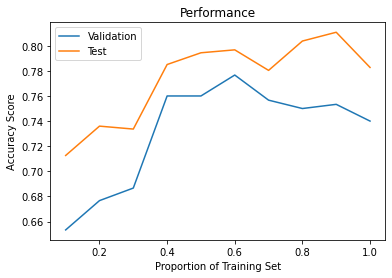

In [270]:
x_label=[.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
plt.title('Performance')
plt.xlabel('Proportion of Training Set')
plt.ylabel('Accuracy Score')
plt.plot(x_label,performance);
plt.legend(['Validation', 'Test'])

#D

In [271]:
x_tr = train.iloc[:,:-1]
y_tr = train.iloc[:,-1:]
x_vl = validate.iloc[:,:-1]
y_vl = validate.iloc[:,-1:]
performance = []
for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_tr, y_tr)
  val_acc = accuracy_score(y_vl, knn.predict(x_vl))
  performance.append(val_acc)
clear_output()

In [272]:
print(performance)

[0.7866666666666666, 0.77, 0.88, 0.8666666666666667, 0.8966666666666666, 0.8833333333333333, 0.8733333333333333, 0.8566666666666667, 0.8733333333333333, 0.8766666666666667]


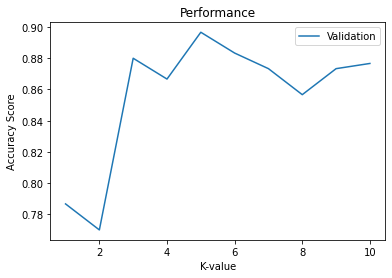

In [273]:
x_label=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.title('Performance')
plt.xlabel('K-value')
plt.ylabel('Accuracy Score')
plt.plot(x_label,performance);
plt.legend(['Validation'])

#E

In [274]:
def get_time():
  start_time = time.time()
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_tr, y_tr)
  end_time=time.time()
  train_time = end_time - start_time

  start_time = time.time()
  knn.predict(x_ts)
  end_time=time.time()
  test_time = end_time - start_time

  return train_time, test_time

In [275]:
cases = [(.1, 2), (1, 2), (.1, 10), (1, 10)]
train_time = []
test_time = []
for case in cases:
  tr = train.sample(frac=case[0], random_state=30)
  x_tr = tr.iloc[:,:-1]
  y_tr = tr.iloc[:,-1:]
  x_ts = test.iloc[:,:-1]
  k = case[1]
  tr_time , ts_time = get_time()
  train_time.append(tr_time)
  test_time.append(ts_time)
clear_output()

**1-Analysis the training time**

<BarContainer object of 4 artists>

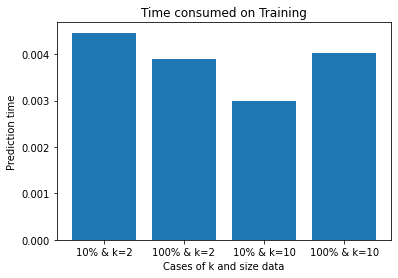

In [276]:
x_label=['10% & k=2','100% & k=2','10% & k=10','100% & k=10']
plt.title('Time consumed on Training')
plt.xlabel('Cases of k and size data')
plt.ylabel('Prediction time')
plt.bar(x_label,train_time)

**2-Prediction time**

<BarContainer object of 4 artists>

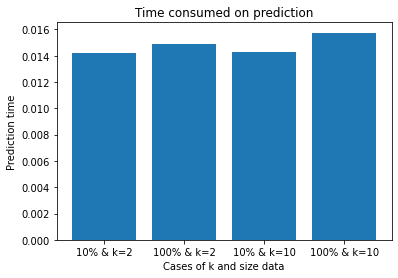

In [277]:
x_label=['10% & k=2','100% & k=2','10% & k=10','100% & k=10']
plt.title('Time consumed on prediction')
plt.xlabel('Cases of k and size data')
plt.ylabel('Prediction time')
plt.bar(x_label,test_time)